# 基尼系数

In [1]:
y = [1, 1, 1, 2, 2, 2, 3, 3, 4]

In [2]:
from collections import Counter
counter = Counter(y)
counter

Counter({1: 3, 2: 3, 3: 2, 4: 1})

In [3]:
counter.values()

dict_values([3, 3, 2, 1])

In [4]:
len(y)

9

In [7]:
def gini(y):
    counter = Counter(y)
    result = 0
    for v in counter.values():
        result += (v / len(y))**2
    return 1 - result

In [8]:
gini(y)

0.7160493827160495

In [9]:
gini([1, 1, 1, 1, 1, 2])

0.2777777777777777

In [10]:
import numpy as np

In [11]:
X = np.array([[5, 5],
             [4, 7],
             [2, 5],
             [1, 3],
             [3, 4]])
y = np.array([0, 0, 0, 1, 1])

In [12]:
import matplotlib.pyplot as plt

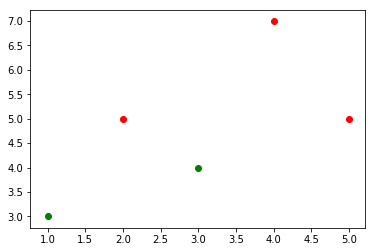

In [13]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='r')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='g')
plt.show()

In [19]:
def cut(X, y, d, v):
    left_index = (X[:, d] <= v)
    right_index = (X[:, d] > v)
    return X[left_index], X[right_index], y[left_index], y[right_index]

def try_split(X, y):
    best_g = 1
    best_d = -1
    best_v = -1
    
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:, d])
        for i in range(len(X)-1):
            if X[sorted_index[i], d] == X[sorted_index[i + 1], d]:
                continue
            
            v = (X[sorted_index[i], d] + X[sorted_index[i + 1], d]) / 2
            # print('d={}, v={}'.format(d, v))
            X_left, X_right, y_left, y_right = cut(X, y, d, v)
            
            g_all = gini(y_left) + gini(y_right)
            
            print('d={}, v={}, g={}'.format(d, v, g_all))
            
            if g_all < best_g:
                best_g = g_all
                best_d = d
                best_v = v
    return best_d, best_v, best_g

In [20]:
try_split(X, y)

d=0, v=1.5, g=0.375
d=0, v=2.5, g=0.9444444444444444
d=0, v=3.5, g=0.4444444444444444
d=0, v=4.5, g=0.5
d=1, v=3.5, g=0.375
d=1, v=4.5, g=0.0
d=1, v=6.0, g=0.5


(1, 4.5, 0.0)